# Wildlife Recognition CNN Keras Tensorflows

## Importing Various Modules

In [39]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import tensorflow as tf
import random as rn
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

## Preparing the Data

In [24]:
import os
rootdir = 'C:/Users/22587/Documents/wildlife'
num =[i for i in range(0,2)]
name =[]

for i in os.listdir(rootdir):
    name.append(i)
final = dict(zip(num, name))


def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        for key,val in final.items():
            if labels == val:
                label = key
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = final
    return labels[class_code]

In [25]:
Images, Labels = get_images('C:/Users/22587/Documents/wildlife/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [26]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (573, 150, 150, 3)
Shape of Labels: (573,)


## Visualizing some Random Images

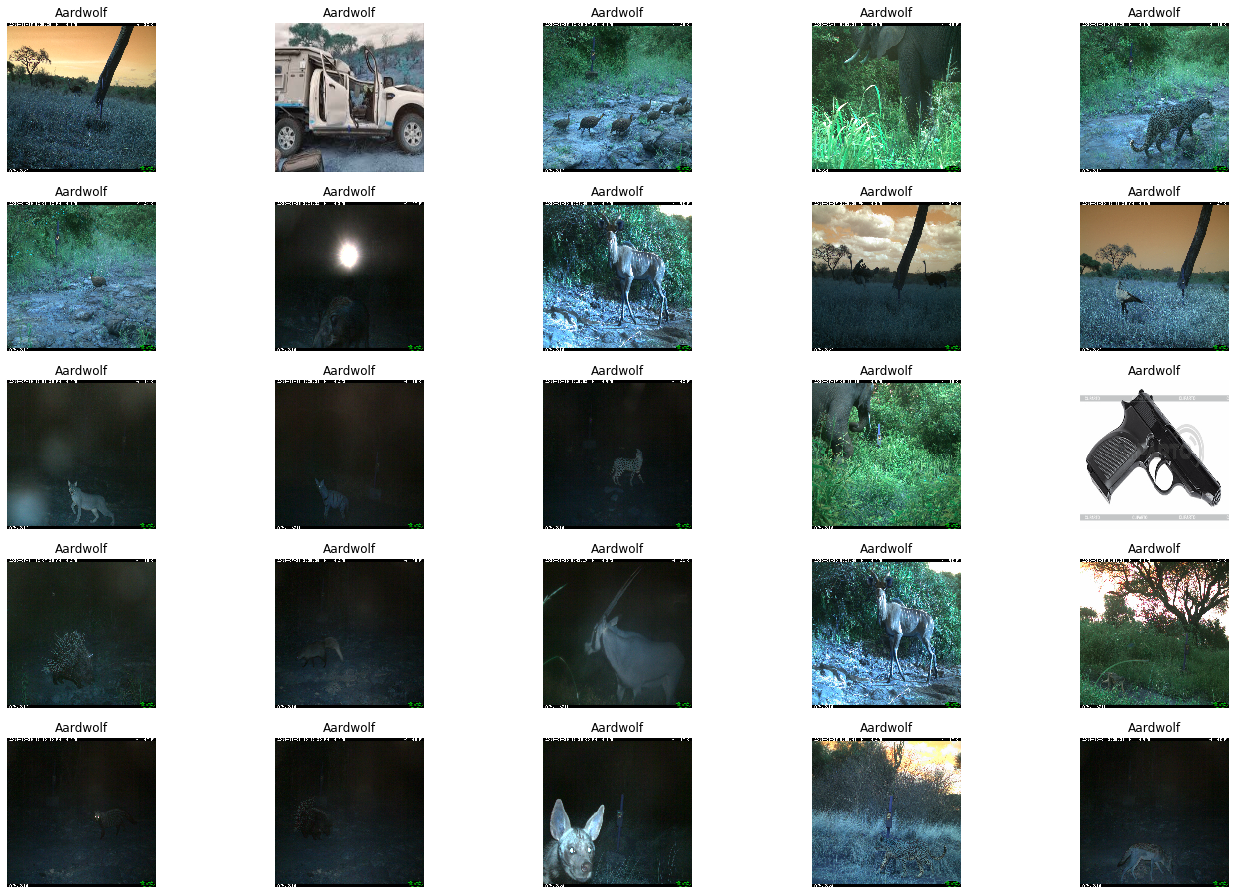

In [27]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

## Splitting into Training and Validation Sets¶

In [28]:
Images_train,Images_test,Labels_train,Labels_test=train_test_split(Images,Labels,test_size=0.25,random_state=42)

## Label Encoding the Y array (i.e. Aardvark->0, Aardwolf->1 etc...)

In [29]:
# Normalize pixel values to be between 0 and 1
Images_train, Images_test = Images_train/255.0, Images_test/255.0

## Setting the Random Seeds

In [30]:
np.random.seed(42)
rn.seed(42)
tf.compat.v1.random.set_random_seed(42)

## Building the ConvNet Model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 50)       

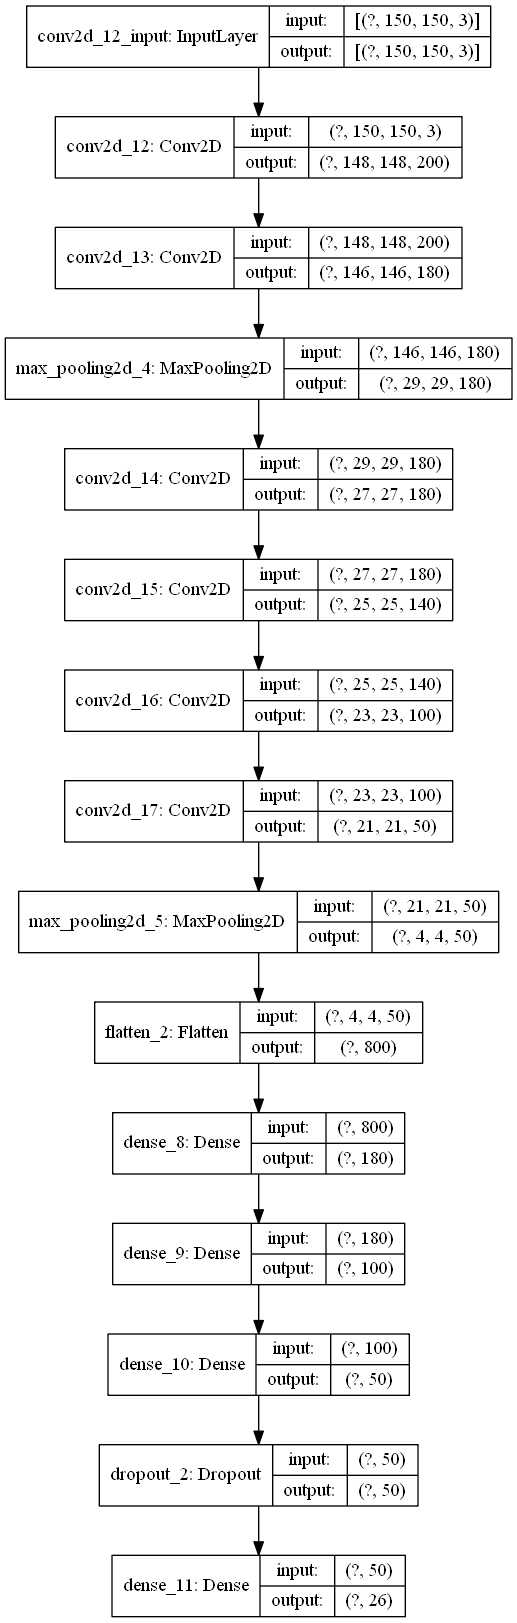

In [31]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(26,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [32]:
trained = model.fit(Images_train,Labels_train,epochs=10,validation_split=0.30)

Epoch 1/10
10/10 [==============================] - 73s 7s/step - loss: 3.1826 - accuracy: 0.3967 - val_loss: 2.9421 - val_accuracy: 0.9690
Epoch 2/10
10/10 [==============================] - 85s 8s/step - loss: 2.2905 - accuracy: 0.6167 - val_loss: 0.9037 - val_accuracy: 0.9690
Epoch 3/10
10/10 [==============================] - 81s 8s/step - loss: 0.9577 - accuracy: 0.7267 - val_loss: 0.5096 - val_accuracy: 0.9690
Epoch 4/10
10/10 [==============================] - 83s 8s/step - loss: 0.9708 - accuracy: 0.7633 - val_loss: 0.4227 - val_accuracy: 0.9690
Epoch 5/10
10/10 [==============================] - 77s 8s/step - loss: 0.7195 - accuracy: 0.8067 - val_loss: 0.4620 - val_accuracy: 0.9690
Epoch 6/10
10/10 [==============================] - 79s 8s/step - loss: 0.6252 - accuracy: 0.8633 - val_loss: 0.3704 - val_accuracy: 0.9690
Epoch 7/10
10/10 [==============================] - 79s 8s/step - loss: 0.4630 - accuracy: 0.8667 - val_loss: 0.3631 - val_accuracy: 0.9690
Epoch 8/10
10/10 [==

## Evaluating the Model Performance

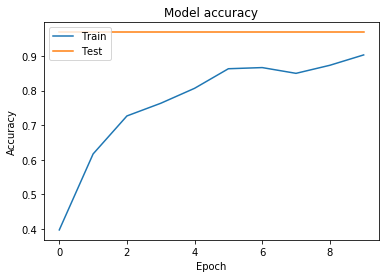

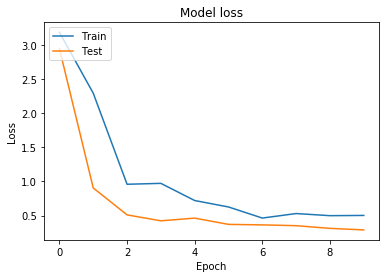

In [33]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [35]:
# getting predictions on val set.
pred=model.predict(Images_test)

In [37]:
pred

array([[2.2020690e-04, 9.6899879e-01, 1.5948010e-05, ..., 4.9640789e-07,
        1.0047569e-04, 3.1786456e-04],
       [3.5082248e-09, 9.9936432e-01, 1.6636937e-11, ..., 2.6822025e-15,
        1.7419423e-09, 6.4332455e-09],
       [2.2970003e-11, 9.9998271e-01, 1.5113104e-15, ..., 1.1841810e-20,
        1.2141092e-13, 1.8079284e-12],
       ...,
       [5.4034177e-10, 9.9993348e-01, 1.0878877e-12, ..., 1.1871508e-16,
        4.5084941e-10, 9.8384882e-09],
       [4.6744473e-05, 9.8444498e-01, 3.1404295e-06, ..., 4.6099728e-08,
        3.5322759e-05, 9.6601361e-05],
       [9.8817843e-09, 9.9973172e-01, 2.7189995e-11, ..., 7.5348976e-15,
        1.1159550e-09, 9.8430153e-09]], dtype=float32)

In [42]:
test_images = np.array(Images_test)
test_labels = np.array(Labels_test)
model.evaluate(test_images,test_labels, verbose=1)

5/5 [==============================] - 31s 6s/step - loss: 0.0312 - accuracy: 1.0000


[0.03117457777261734, 1.0]

## Save the model

In [44]:
keras_model_path = "C:/Users/22587/Documents/wildlife"
model.save(keras_model_path)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/22587/Documents/wildlife\assets


# THE END